
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 80</p>
## <p style="text-align: center;">Due: Tuesday, September 18 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 


### Try to solve the right problem but have the wrong tools: 

Couple of years ago, I was working on patients charts data to understand patient characteristics, prescribing behavior, physician perceptions and brand loyalty for different drugs in the Multiple Myeloma market. I wanted to run the random forest algorithm in R to better understand the important patient characteristics associated with different drug types. Our team had never worked on any advanced predictive models and hence it took me at least a week to convince my manager to try using it. Even after the approval from my manager the IT team refused to allow me the permission to install the random forest package in R, citing data security reasons. We eventually analyzed the data using traditional tools such as Excel and in-house analytics platform, which limited my analysis to the traditional insights. I believe concerns over data security and slow acceptance of advanced analytical and statistical tools such as R and Python by senior leadership is a major reasons for having limited tools and resources to analyze data.




# Question 2: Maximum likelihood estimate (10 pts)

Prove the statement on slide 3 of notes on MLR:
"Then minimizing Mean Squared Error (MSE) on the training data (which you can do using OLS) yields the Maximum Likelihood Estimate (MLE) solution of the assumed generative model."


## Answer 

Populating the interactive namespace from numpy and matplotlib


C:\Users\bandi\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


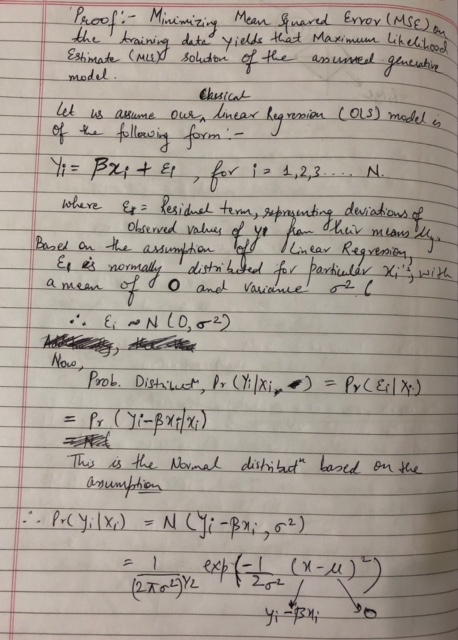

In [276]:
%pylab inline
from PIL import Image
Image.open("Q2_1.jpg")

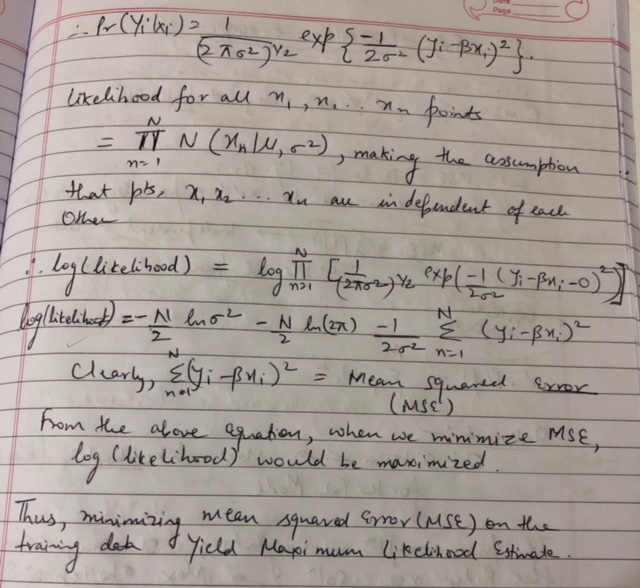

In [277]:
Image.open("Q2_2.jpg")

# Question 3: Collinearity Issues (5 pts)

What is the “collinearity” issue encountered in MLR? Why is this a problem when you try to use MLR?
Suggest one way of addressing this problem.


## Answer



"Collinearity" in MLR means that the predictors (X's) are correlatd among themselves. Collinearity could make it difficult to understand the values of parameters and we could potentially make incorrect interpretations for the same.

Collinearity is a problem with Multiple Linear Regression because of the following 2 reasons:

1. Correlation between predictors affects the interpretability of parameters (Beta - coefficients)
2. Dependencies between predictors increases the stadard error of the parameters


We can address this problem by either increasing the # of data points, which will reduce the standard error for the parameter (coefficients) or by using new predictor variables which are less correlated.While adding new variables could make the mean squared error to reduce, the standard error of the parameters might increase.

# Question 4: Multiple Linear Regression in Python (20 pts)

Use the following code to import the allstate-claims-severity dataset and linear models in python. The dataset is taken from https://www.kaggle.com/c/allstate-claims-severity I have removed the categorical variables to make it easier to run the models. Because of this, MAE (Mean absolute error) will be on higher end compared to other Kaggle entries. Please download the dataset "reduced_train.csv" and use it.

## Answer


In [7]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

train_df = pd.read_csv("reduced_train.csv")

X = train_df.drop(['id','loss'],axis=1)
Y = train_df['loss']

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

In [23]:
# Shape of X 
print (X.shape)
# Printing the first 5 rows
X.head()

(188318, 14)


cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0  0.726300  0.245921  0.187583  0.789639  0.310061  0.718367  0.335060   
1  0.330514  0.737068  0.592681  0.614134  0.885834  0.438917  0.436585   
2  0.261841  0.358319  0.484196  0.236924  0.397069  0.289648  0.315545   
3  0.321594  0.555782  0.527991  0.373816  0.422268  0.440945  0.391128   
4  0.273204  0.159990  0.527991  0.473202  0.704268  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.


In [2]:
# Fitting multiple linear regression on all the features using the entire data set using OLS
reg = linear_model.LinearRegression()
reg.fit (X, Y)

#Calculating regression coefficient for each input feature

pd.concat([pd.DataFrame(X.columns.values,columns = ['Features']),\
           pd.DataFrame(reg.coef_ ,columns = ['Regression_coefficients'])],axis =1)

Features  Regression_coefficients
0     cont1             -2137.111212
1     cont2              1762.240616
2     cont3               -56.579685
3     cont4              -301.172981
4     cont5                30.032018
5     cont6              -557.225099
6     cont7              1707.955206
7     cont8               298.612406
8     cont9              2049.379104
9    cont10              -250.019861
10   cont11             -1732.348874
11   cont12              2724.389858
12   cont13              -631.301289
13   cont14               273.626005

In [3]:
#Calculating the Mean Absolute Error
print ('Mean Absolute Error of the Multiple Linear regression Model is :',mean_absolute_error(Y,reg.predict(X)))

Mean Absolute Error of the Multiple Linear regression Model is : 1950.3606265639835


c.  (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. The code for this is given below. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)
reg = linear_model.LinearRegression()
reg.fit (X_train, Y_train)
# Prediction on Training Data
prediction_train = reg.predict(X_train)
MAE_train = mean_absolute_error(Y_train,prediction_train)

#Predicton on the Test Data 
prediction_test = reg.predict(X_test)
MAE_test = mean_absolute_error(Y_test,prediction_test)


print ('Mean Absolute Error from the trained data is :', MAE_train)
print ('Mean Absolute Error from the test data is :', MAE_test)

Mean Absolute Error from the trained data is : 1946.9866773014621
Mean Absolute Error from the test data is : 1954.111059596165


The MAE obtained on the test data is slightly higher

d.  (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE. Explain the results.

C:\Users\bandi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\bandi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


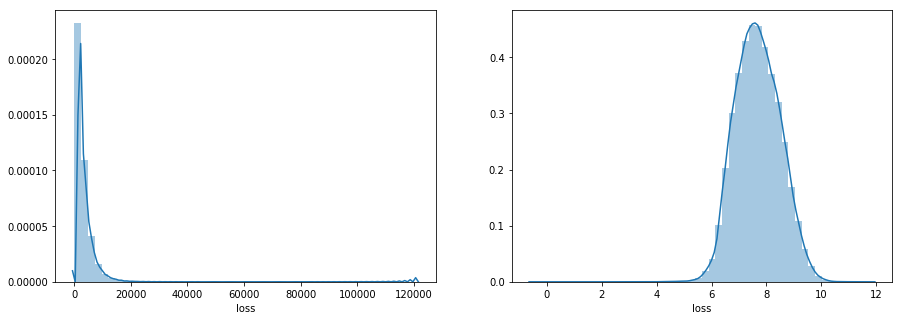

In [26]:

# Plotting histograms for Y_train and log(Y_train)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey = False, figsize = (15,5))

sns.distplot(Y_train,hist = True, ax = ax1)
sns.distplot(np.log(Y_train),hist = True, ax = ax2)

In [10]:
log_Y_train = np.log(Y_train)
reg.fit (X_train, log_Y_train)
prediction_test = np.exp(reg.predict(X_test))
MAE_test = mean_absolute_error(Y_test,prediction_test)

#prediction_test

print ('The new MAE is :',MAE_test)

The new MAE is : 1810.6519682594767


The MAE reduced after taking log (Y_train), because Y_train was not normally distributed. Hence it was violating the linear regression's assumption. Once we took log (Y_train), the predictor became normally distributed, thus reducing the MAE.

# Question 5: Ridge and Lasso Regression (25 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. Take log of the Y_train and use it for training.

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-6}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-6,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

## Answer



C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

Best lambda based on min average MAE from Lasso Regression is : 6.309284415330092e-05


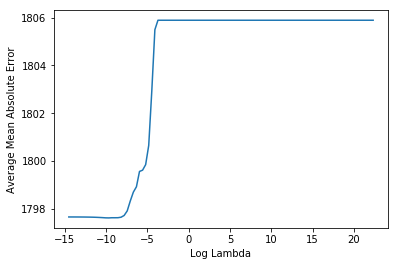

In [69]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

# Setting the range for alpha and # of k folds required
alphas =  10**np.linspace(10,-6,100)*0.5
kf = KFold(n_splits=5)
MAE_cv = pd.DataFrame(columns = alphas)

# Loop for 5 cross validations
for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = np.array(X_train)[train_index], np.array(X_train)[test_index]
    y_train, y_test = np.array(log_Y_train)[train_index], np.array(log_Y_train)[test_index]
    MAE = []
    # Loop for all the alphas (lambda)
    for i in range(len(alphas)):
        reg = linear_model.Lasso(alpha = alphas[i])
        reg.fit(X_train_cv,y_train)
        prediction = np.exp(reg.predict(X_test_cv))
        MAE.append(mean_absolute_error(np.exp(y_test),prediction))
    MAE_cv.loc[len(MAE_cv)] = MAE
    
# Calculating the minimum lambda based on the average MAE 
lambda_min_lasso = MAE_cv.mean(axis =0).idxmin()

# Plotting Avergae MAE against lambda
plt.plot(np.log(alphas),MAE_cv.mean(axis =0).values)
plt.xlabel('Log Lambda')
plt.ylabel('Average Mean Absolute Error')

print ('Best lambda based on min average MAE from Lasso Regression is :', lambda_min_lasso)

Best lambda based on min average MAE from Ridge Regression is : 13.5929412136647


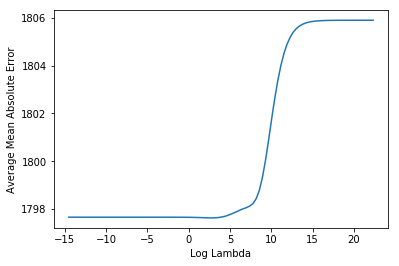

In [71]:
# Ridge Regression - We will repeat the entire process for Ridge Regression 
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

# Setting the rang for alpha and # of k folds required
alphas =  10**np.linspace(10,-6,100)*0.5
kf = KFold(n_splits=5)
MAE_cv = pd.DataFrame(columns = alphas)

# Loop for 5 cross validations
for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = np.array(X_train)[train_index], np.array(X_train)[test_index]
    y_train, y_test = np.array(log_Y_train)[train_index], np.array(log_Y_train)[test_index]
    MAE = []
    # Loop for all the alphas (lambda)
    for i in range(len(alphas)):
        reg = linear_model.Ridge(alpha = alphas[i])
        reg.fit(X_train_cv,y_train)
        prediction = np.exp(reg.predict(X_test_cv))
        MAE.append(mean_absolute_error(np.exp(y_test),prediction))
    MAE_cv.loc[len(MAE_cv)] = MAE
    
# Calculating the minimum lambda based on the average MAE 
lambda_min_ridge = MAE_cv.mean(axis =0).idxmin()

# Plotting Avergae MAE against lambda
plt.plot(np.log(alphas),MAE_cv.mean(axis =0).values)
plt.xlabel('Log Lambda')
plt.ylabel('Average Mean Absolute Error')

print ('Best lambda based on min average MAE from Ridge Regression is :', lambda_min_ridge)

In [23]:
# Running Lasso Regression for all the alpha values
alphas =  10**np.linspace(10,-6,100)*0.5
coefs = []
for i in range(len(alphas)):
        reg_lasso = linear_model.Lasso(alpha = alphas[i])
        reg_lasso.fit(X_train,log_Y_train)
        prediction = np.exp(reg_lasso.predict(X_test))
        coefs.append(reg_lasso.coef_)

C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5,1,'Lasso coefficients as a function of regularization')

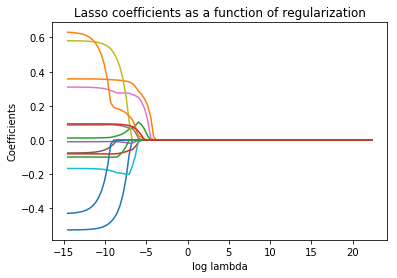

In [24]:
ax = plt.gca()
ax.plot(np.log(alphas), coefs)
#ax.set_xscale('log')
plt.xlabel('log lambda')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of regularization')

Text(0.5,1,'Ridge coefficients as a function of regularization')

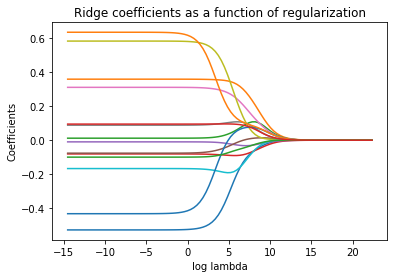

In [22]:
# Running Lasso Regression for all the alpha values
alphas =  10**np.linspace(10,-6,100)*0.5
coefs = []
for i in range(len(alphas)):
        reg_ridge = linear_model.Ridge(alpha = alphas[i])
        reg_ridge.fit(X_train,log_Y_train)
        prediction = np.exp(reg_ridge.predict(X_test))
        coefs.append(reg_ridge.coef_)
        
# Plot ridge coefficients asa function of lambda
ax = plt.gca()
ax.plot(np.log(alphas), coefs)
#ax.set_xscale('log')
plt.xlabel('log lambda')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of regularization')

Overall as we increase the value of regularization term (lambda), the coefficents become closer to zero.

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

In [73]:
# Least Square Regression
reg = linear_model.LinearRegression()
reg.fit (X_train, log_Y_train)
prediction_test = np.exp(reg.predict(X_test))
MAE_test = mean_absolute_error(Y_test,prediction_test)

# Lasso Regression
reg_lasso = linear_model.Lasso(alpha = lambda_min_lasso)
reg_lasso.fit(X_train,log_Y_train)
prediction_lasso = np.exp(reg_lasso.predict(X_test))
MAE_test_lasso = mean_absolute_error(Y_test,prediction_lasso)

# Ridge Regression
reg_ridge = linear_model.Ridge(alpha = lambda_min_ridge)
reg_ridge.fit(X_train,log_Y_train)
prediction_ridge = np.exp(reg_ridge.predict(X_test))
MAE_test_ridge = mean_absolute_error(Y_test,prediction_ridge)

print('MAE for least square regression is:', MAE_test)
print('MAE for lasso regression is:', MAE_test_lasso)
print('MAE for ridge regression is:', MAE_test_ridge)

MAE for least square regression is: 1810.6519682594767
MAE for lasso regression is: 1810.6424216634994
MAE for ridge regression is: 1810.6310418084493


4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

In [247]:
# Running Lasso with cross validation 
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, log_Y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [275]:
mse = []
for i in range(len(lasso_cv.mse_path_)):
    avg_mse = lasso_cv.mse_path_[i].mean()
    mse.append(avg_mse)
    
# Calculate the lambda which minimizes mean squared error
min_lambda_lasso_cv = lasso_cv.alphas_[mse.index(min(mse))]

# Run the lasso regression on the minimum lambda
reg_lasso = linear_model.Lasso(alpha = min_lambda_lasso_cv)
reg_lasso.fit(X_train,log_Y_train)

# Calculate the coefficients for all the variables
reg_lasso.coef_

array([-0.51711206,  0.35693216,  0.01261526, -0.08068485, -0.00950437,
       -0.06881325,  0.30609698,  0.08840324,  0.57216477, -0.16869083,
       -0.35348216,  0.55420528, -0.09951851,  0.09436384])

# Question 6 (10pts)

Please solve problem \#3.3 on page 174 in Bishop (Chapter 3). The problem has been uploaded to Canvas under 'Files': **CH3 problems from Bishop PRML.pdf**.

## Answer

Populating the interactive namespace from numpy and matplotlib


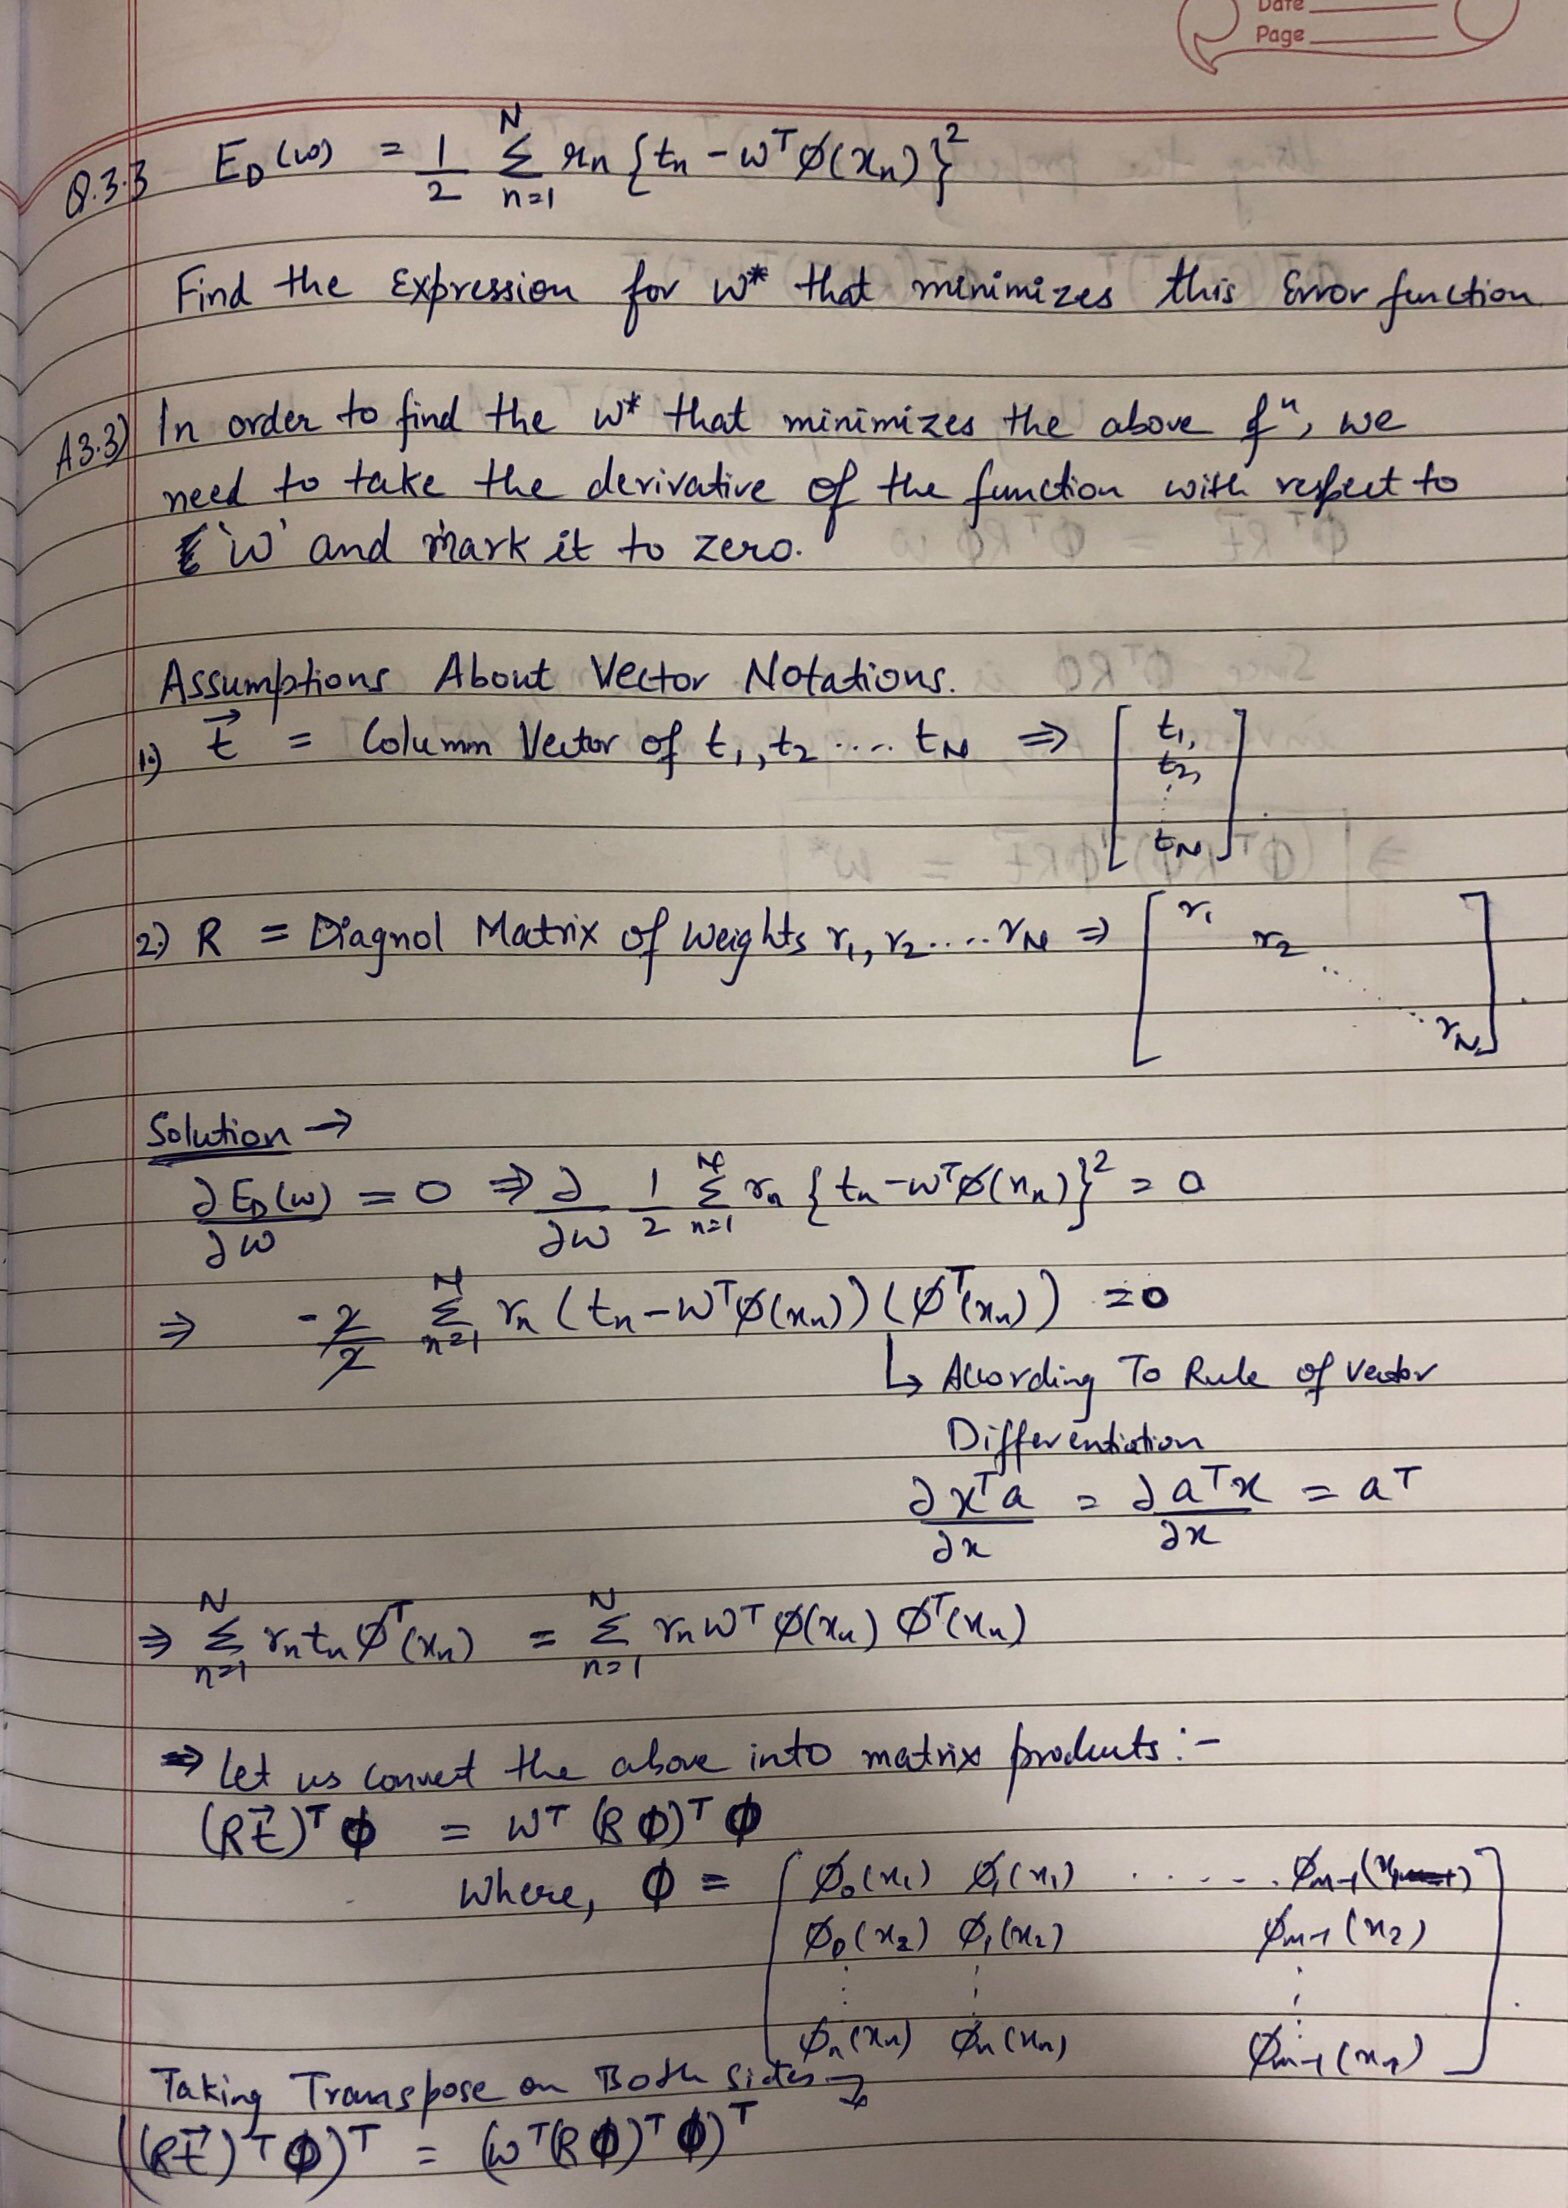

In [12]:
Image.open("Q6_1.jpg")

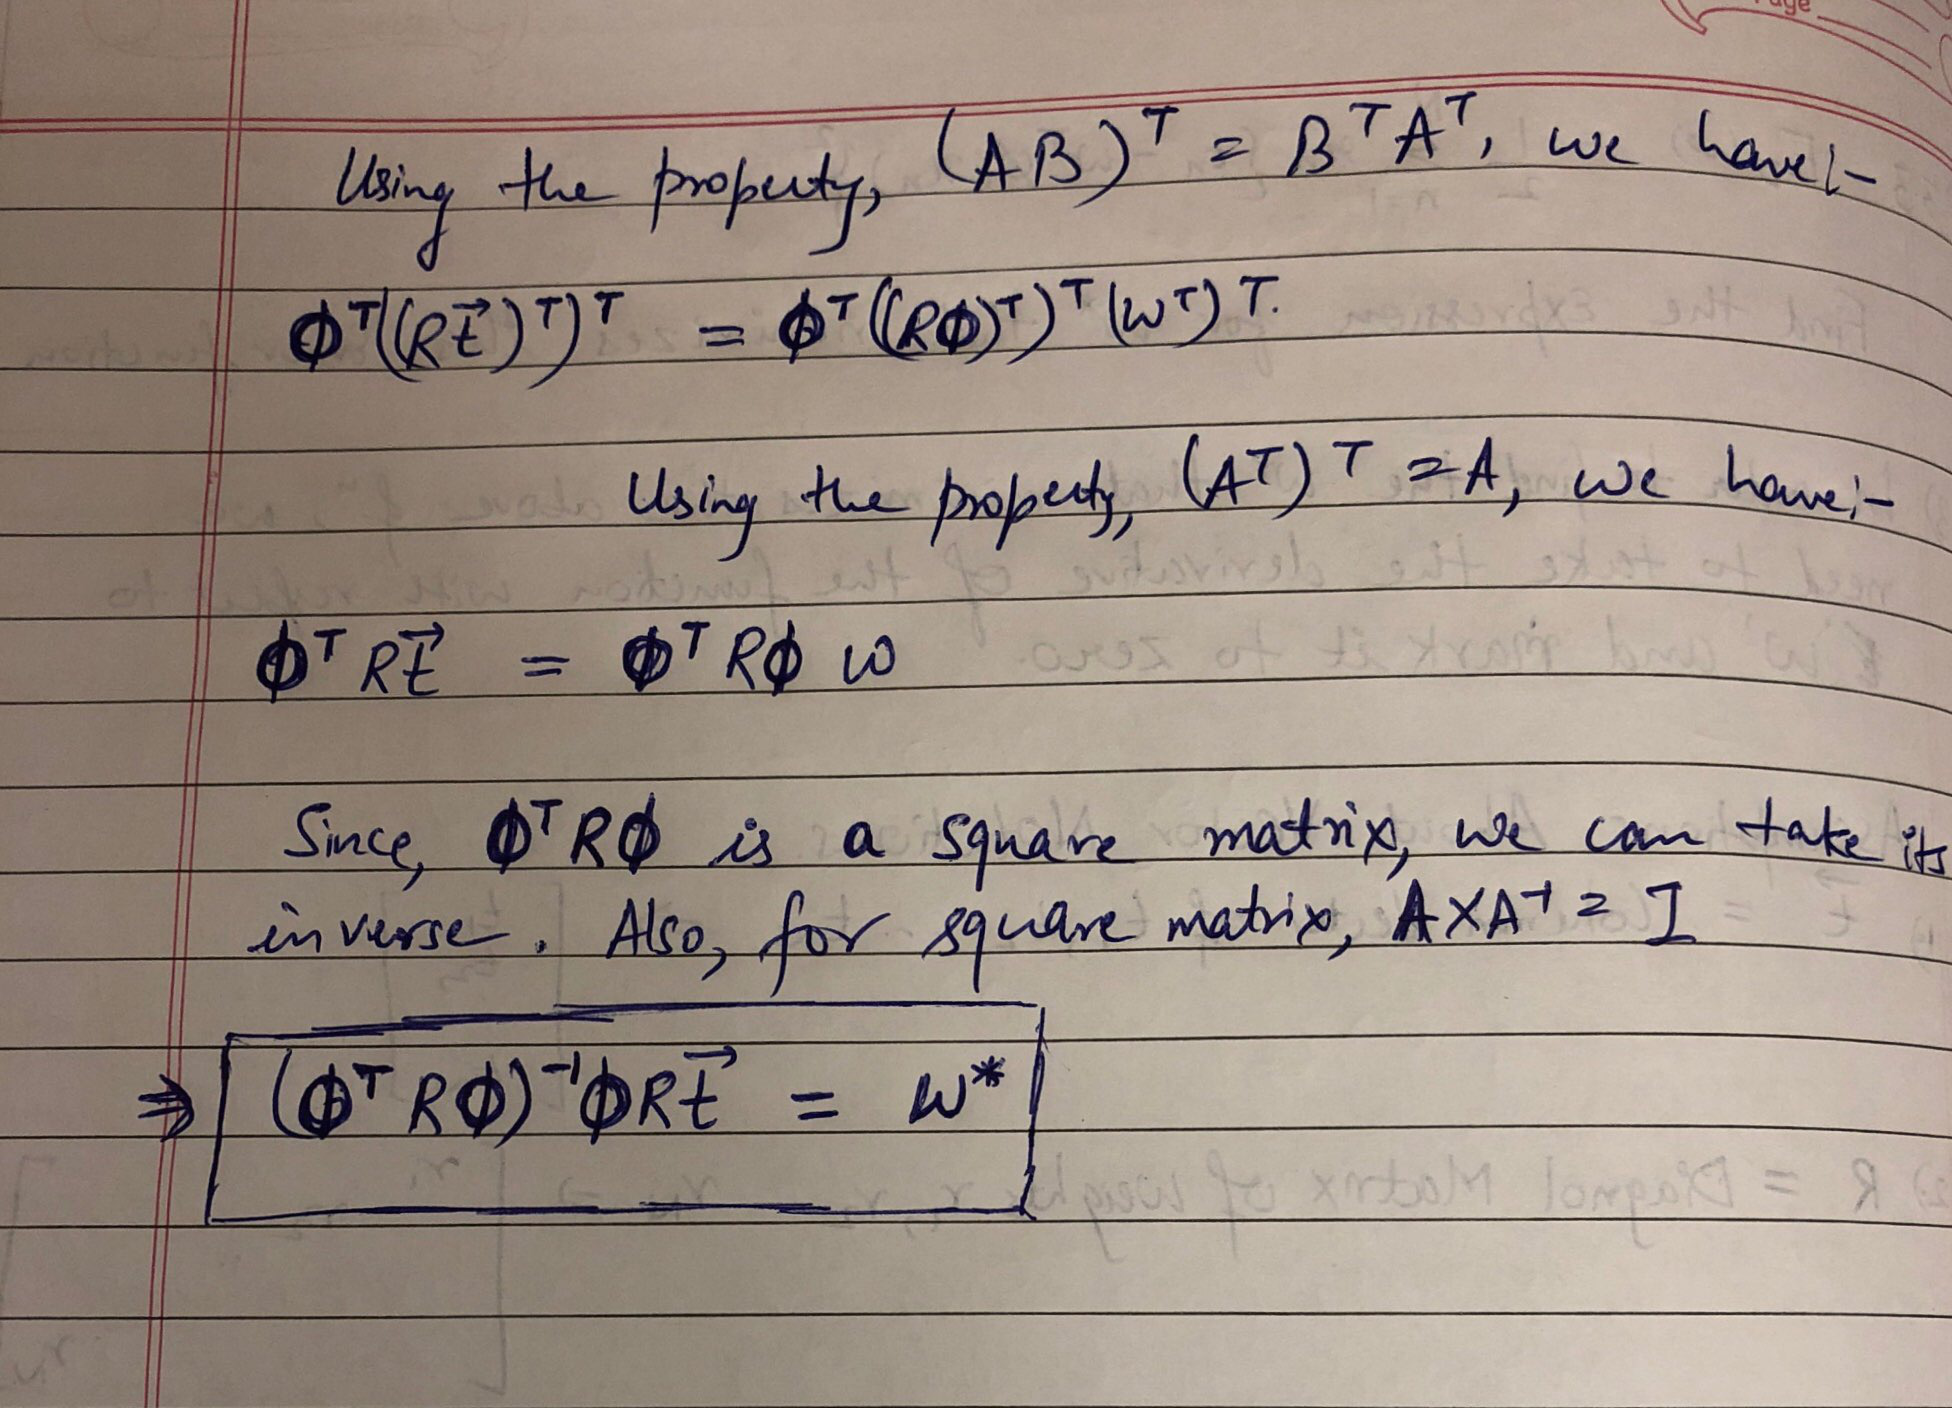

In [13]:
Image.open("Q6_2.jpg")

Explanation:

1. It might sometimes be important to strongly predict the response for certain values of inputs (maybe the ones which we might see often or maybe the ones where mistakes could be very costly). Thus if we give these values more weights and points elesewhere lesser weights, the regression will be pulled towards matching the data near those points. 

2. ***Data dependent noise variance***: While linear regression assumes that noise in the data has constant variance, it is usually not correct in real data sets.If we know the noise variance of each measurement in the data set, we can set our weights in such a way which can minimize this variance. 

3. ***Replicated data points***: It might be possible that some of the data points are over-sampled or have a high probability of including, while otherse could be under-sAmpled or have a low probability of including in the sample. We can then weight the data points in an inverse proportion to their probability of inclusion.